In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('LinkedIn Job Data.csv')
df.head()

,Company Name,Job Posting Time,Number of Applicants,Seniority Level,Company Industry,Detail description,Employment Type,Job Function,Size of Employee,Keyword
0,Blibli.com,4 weeks ago,96,Mid-Senior level,Retail,"As Data Engineer in blibli, you need to build ...",Full-time,"Information Technology,Analyst,Strategy/Planning",NaN,Senior Data Engineer
1,Flip.id,3 days ago,29,Mid-Senior level,"Financial Services,Banking,Information Technol...",Direct message the job poster from Flip.id Wul...,Full-time,Engineering,NaN,Senior Data Engineer
2,Sayurbox,4 weeks ago,<25,Associate,"Marketing and Advertising,Market Research,Inte...",Sayurbox is a provider of fresh produce to hou...,Full-time,Information Technology,NaN,Senior Data Engineer
3,Tjetak,16 hours ago,<25,Associate,Information Technology and Services,Direct message the job poster from Tjetak Hasa...,Full-time,Information Technology,NaN,Senior Data Engineer
4,Blue Bird Group,1 week ago,<25,Associate,Transportation/Trucking/Railroad,Direct message the job poster from Blue Bird G...,Full-time,Information Technology,NaN,Senior Data Engineer


In [3]:
df.shape

(520, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company Name          520 non-null    object 
 1   Job Posting Time      520 non-null    object 
 2   Number of Applicants  520 non-null    object 
 3   Seniority Level       520 non-null    object 
 4   Company Industry      498 non-null    object 
 5   Detail description    520 non-null    object 
 6   Employment Type       520 non-null    object 
 7   Job Function          520 non-null    object 
 8   Size of Employee      0 non-null      float64
 9   Keyword               520 non-null    object 
dtypes: float64(1), object(9)
memory usage: 40.8+ KB


In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
Company Name,Company Name,0.000000
Job Posting Time,Job Posting Time,0.000000
Number of Applicants,Number of Applicants,0.000000
Seniority Level,Seniority Level,0.000000
Detail description,Detail description,0.000000
Employment Type,Employment Type,0.000000
Job Function,Job Function,0.000000
Keyword,Keyword,0.000000
Company Industry,Company Industry,4.230769
Size of Employee,Size of Employee,100.000000


In [6]:
df.drop(columns='Size of Employee', inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
Company Name,Company Name,0.0
Job Posting Time,Job Posting Time,0.0
Number of Applicants,Number of Applicants,0.0
Seniority Level,Seniority Level,0.0
Company Industry,Company Industry,0.0
Detail description,Detail description,0.0
Employment Type,Employment Type,0.0
Job Function,Job Function,0.0
Keyword,Keyword,0.0


In [9]:
df['Job Posting Time'].value_counts()

2 weeks ago     84
3 weeks ago     82
1 week ago      66
1 month ago     59
2 months ago    53
4 weeks ago     43
2 days ago      34
3 days ago      14
6 months ago     9
3 months ago     8
5 months ago     6
4 months ago     5
6 days ago       4
4 days ago       4
5 days ago       4
7 days ago       4
16 hours ago     3
17 hours ago     3
22 hours ago     3
9 hours ago      2
19 hours ago     1
13 hours ago     1
10 hours ago     1
1 year ago       1
3 hours ago      1
1 day ago        1
14 hours ago     1
18 hours ago     1
Name: Job Posting Time, dtype: int64

In [10]:
def post_time_to_day(time):
    result = 0
    if 'month' in time:
        result = int(time.split()[0]) * 30
    elif 'week' in time:
        result = int(time.split()[0]) * 7
    elif 'day' in time:
        result = int(time.split()[0])
    elif ('hour' in time) | ('minute' in time) | ('second' in time):
        result = 1
    return result

In [11]:
df['day_past'] = df['Job Posting Time'].apply(post_time_to_day)
df.head()

,Company Name,Job Posting Time,Number of Applicants,Seniority Level,Company Industry,Detail description,Employment Type,Job Function,Keyword,day_past
0,Blibli.com,4 weeks ago,96,Mid-Senior level,Retail,"As Data Engineer in blibli, you need to build ...",Full-time,"Information Technology,Analyst,Strategy/Planning",Senior Data Engineer,28
1,Flip.id,3 days ago,29,Mid-Senior level,"Financial Services,Banking,Information Technol...",Direct message the job poster from Flip.id Wul...,Full-time,Engineering,Senior Data Engineer,3
2,Sayurbox,4 weeks ago,<25,Associate,"Marketing and Advertising,Market Research,Inte...",Sayurbox is a provider of fresh produce to hou...,Full-time,Information Technology,Senior Data Engineer,28
3,Tjetak,16 hours ago,<25,Associate,Information Technology and Services,Direct message the job poster from Tjetak Hasa...,Full-time,Information Technology,Senior Data Engineer,1
4,Blue Bird Group,1 week ago,<25,Associate,Transportation/Trucking/Railroad,Direct message the job poster from Blue Bird G...,Full-time,Information Technology,Senior Data Engineer,7


In [12]:
df['day_past'].value_counts()

14     84
21     82
7      70
30     59
60     53
28     43
2      34
1      18
3      14
180     9
90      8
150     6
120     5
6       4
5       4
4       4
0       1
Name: day_past, dtype: int64

In [13]:
df.dtypes

Company Name            object
Job Posting Time        object
Number of Applicants    object
Seniority Level         object
Company Industry        object
Detail description      object
Employment Type         object
Job Function            object
Keyword                 object
day_past                 int64
dtype: object

In [14]:
# Convert Number of Applicants to number, especially <25 and >200
# df['Number of Applicants'].value_counts()
# replace <25 with 12 ==> ((0 + 25) / 2) as the assumption
# replace >200 with 200

df['Number of Applicants'].replace('<25', 12, inplace=True)
df['Number of Applicants'].replace('>200', 200, inplace=True)
df['Number of Applicants'] = df['Number of Applicants'].astype('int')

df.dtypes

Company Name            object
Job Posting Time        object
Number of Applicants     int32
Seniority Level         object
Company Industry        object
Detail description      object
Employment Type         object
Job Function            object
Keyword                 object
day_past                 int64
dtype: object

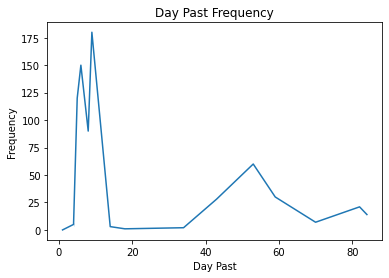

In [15]:
# Day past frequency line plot
ax=sns.lineplot(y=df['day_past'].value_counts().index,x=df['day_past'].value_counts().values)
plt.xlabel('Day Past')
plt.ylabel('Frequency')
plt.title('Day Past Frequency')
plt.show()

# Implication: most job scrapped are posted around 1-2 week

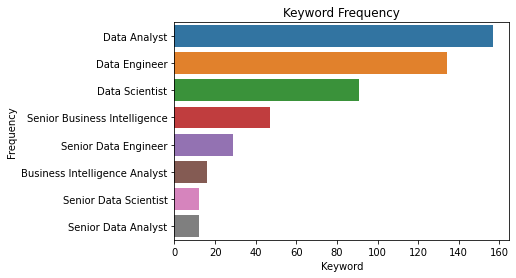

In [16]:
# Keyword Frequency bar plot
ax=sns.barplot(y=df['Keyword'].value_counts().index,x=df['Keyword'].value_counts().values)
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Keyword Frequency')
plt.show()

# Implication: Data analyst keyword has the most scrapped job post

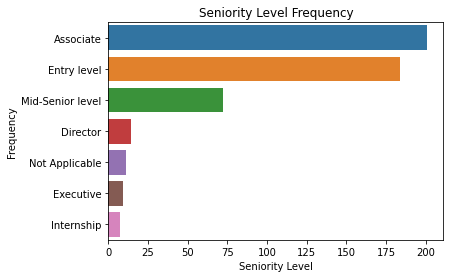

In [17]:
# Keyword Frequency bar plot
ax=sns.barplot(y=df['Seniority Level'].value_counts().index,x=df['Seniority Level'].value_counts().values)
plt.xlabel('Seniority Level')
plt.ylabel('Frequency')
plt.title('Seniority Level Frequency')
plt.show()

# Implication: most job scrapped are looking for Associate and Entry Level Seniority

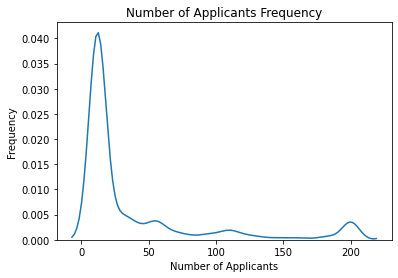

In [18]:
# Keyword Frequency bar plot
ax=sns.distplot(df['Number of Applicants'], hist=False)
plt.xlabel('Number of Applicants')
plt.ylabel('Frequency')
plt.title('Number of Applicants Frequency')
plt.show()

# Implication: most job scrapped are applied less than 50 applicants